In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [2]:
# Loading the Boston Housing dataset
boston_dataset = pd.read_csv('Boston.csv')
boston = pd.DataFrame(boston_dataset, columns=boston_dataset.columns)
boston['MEDV'] = boston_dataset['medv']




In [3]:
boston_dataset.shape

(506, 16)

In [4]:
print(boston_dataset.head(5))

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  MEDV  
0  296     15.3  396.90   4.98  24.0  24.0  
1  242     17.8  396.90   9.14  21.6  21.6  
2  242     17.8  392.83   4.03  34.7  34.7  
3  222     18.7  394.63   2.94  33.4  33.4  
4  222     18.7  396.90   5.33  36.2  36.2  


In [5]:
print(np.shape(boston_dataset))

(506, 16)


In [6]:
print(boston_dataset.describe())

       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

In [7]:
# Split the data into training and testing sets
X = boston.drop('MEDV', axis=1)
Y = boston['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [8]:


# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [27]:
# Train the model
history = model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 560.8013 - val_loss: 545.5715
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 498.4428 - val_loss: 478.6798
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 421.4762 - val_loss: 390.4594
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 318.0855 - val_loss: 275.6785
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 198.0845 - val_loss: 157.0129
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 98.7583 - val_loss: 78.6754
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 53.6428 - val_loss: 49.1560
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 38.8469 - val_loss: 34.0803
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 27.1368 - val_loss: 25.0147
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 20.288

13/13 [==============================] - 0s 4ms/step - loss: 1.1856 - val_loss: 1.8269
Epoch 83/100
13/13 [==============================] - 0s 4ms/step - loss: 1.1612 - val_loss: 1.7811
Epoch 84/100
13/13 [==============================] - 0s 4ms/step - loss: 1.1324 - val_loss: 1.7515
Epoch 85/100
13/13 [==============================] - 0s 4ms/step - loss: 1.1078 - val_loss: 1.7353
Epoch 86/100
13/13 [==============================] - 0s 4ms/step - loss: 1.0865 - val_loss: 1.6921
Epoch 87/100
13/13 [==============================] - 0s 4ms/step - loss: 1.0822 - val_loss: 1.6385
Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 1.0288 - val_loss: 1.6296
Epoch 89/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9945 - val_loss: 1.5838
Epoch 90/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9815 - val_loss: 1.5559
Epoch 91/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9523 - val_loss: 1.5418
Epoch 92/100


In [28]:
# Evaluate the model
Y_pred = model.predict(X_test_scaled)
r2 = r2_score(Y_test, Y_pred)
print("R^2 score:", r2)


4/4 [==============================] - 0s 2ms/step
R^2 score: 0.9868791022022617


C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='True Values', ylabel='Predicted Values'>

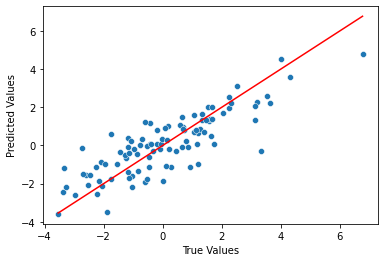

In [29]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Generate some sample data
X = np.random.normal(0, 1, 100)
Y = 2 * X + np.random.normal(0, 1, 100)

# Fit a linear regression model
model = np.polyfit(X, Y, 1)

# Make predictions on the training data
Y_pred = np.polyval(model, X)

# Add axis labels
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Create a scatter plot of predicted vs true values
sns.scatterplot(np.squeeze(Y), np.squeeze(Y_pred))

# Add a diagonal line to show perfect correlation
sns.lineplot(np.squeeze(Y), np.squeeze(Y), color='red')

